<a href="https://colab.research.google.com/github/EmanSalah2000/classification_FromScratch/blob/main/classification_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


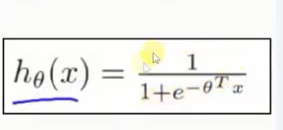

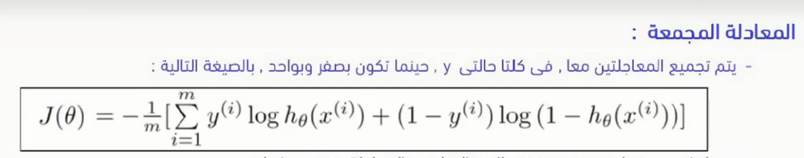

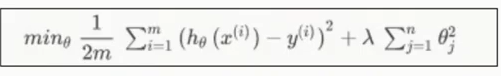

# **code without streamlit**

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.optimize as opt

# def sigmoid(z):
#     return 1 / (1 + np.exp(-z))


# def costReg(theta, X, y, lr ):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
#     first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
#     second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
#     reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
     
#     return np.sum(first - second) / (len(X)) + reg




# def gradientReg(theta, X, y, learningRate):
#     theta = np.matrix(theta)
#     X = np.matrix(X)
#     y = np.matrix(y)
    
#     parameters = int(theta.ravel().shape[1])
#     grad = np.zeros(parameters)
    
#     error = sigmoid(X * theta.T) - y
    
#     for i in range(parameters):
#         term = np.multiply(error, X[:,i])
        
#         if (i == 0):
#             grad[i] = np.sum(term) / len(X)
#         else:
#             grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    
#     return grad

    
# def predict(theta, X):
#     probability = sigmoid(X * theta.T)
#     return [1 if x >= 0.5 else 0 for x in probability]

# def read_data():
#   path = '/content/classification_regularization.txt'
#   data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
#   return data


# def draw(data):
#   positive = data[data['Accepted'].isin([1])]
#   negative = data[data['Accepted'].isin([0])]

#   fig, ax = plt.subplots(figsize=(5,5))
#   ax.scatter(positive['Test 1'], positive['Test 2'],
#             s=50, c='b', marker='o', label='Accepted')
#   ax.scatter(negative['Test 1'], negative['Test 2'],
#             s=50, c='r', marker='x', label='Rejected')
#   ax.legend()
#   ax.set_xlabel('Test 1 Score')
#   ax.set_ylabel('Test 2 Score')


# def process_data(data):
#   # print('data = ')
#   # print(data.head(10) )
#   # print('................................................')
#   # print('data.describe = ')
#   # print(data.describe())

#   draw(data)
#   x1 = data['Test 1']
#   x2 = data['Test 2']
#   data.insert(3, 'Ones', 1)   # adding x0    where   name    value

#   '''
#   x1 + x1^2 + x1x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3


#   F10 = x1

#   F20 = x1^2
#   F21 = x1 x2

#   F30 = x1^3
#   F31 = x1^2 x2
#   F32 = x1 x2^2

#   F40 = x1^4
#   F41 = x1^3 x2
#   F42 = x1^2 x2^2
#   F43 = x1 x2^3 

#   '''

#   degree = 5
#   for i in range(1, degree): # 1,2,3,4 for x 
#       for j in range(0, i):  # 0 , 1 , 2 ,2 foe exp
#           data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) # i=3 , j=2


#   data.drop('Test 1', axis=1, inplace=True) # axis  العمود كله
#   data.drop('Test 2', axis=1, inplace=True)



#   return data

# def classification_regularization(data , learningRate):
#   # set X and y (remember from above that we moved the label to column 0)
#   cols = data.shape[1]
#   X = data.iloc[:,1:cols]
#   y = data.iloc[:,0:1]

#   X = np.array(X.values)
#   y = np.array(y.values)
#   theta = np.zeros(X.shape[1]) # 118*11   shape[1] = 11


#   rcost = costReg(theta, X, y, learningRate)
#   # print()
#   # print('regularized cost = ' , rcost)
#   # print()

#   result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg,
#                       args=(X, y, learningRate))

#   # print( 'result = ' , result )
#   # print()
#   theta_min = np.matrix(result[0])
#   predictions = predict(theta_min, X)
#   correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
#   accuracy = (sum(map(int, correct)) % len(correct))

#   # print ('accuracy = {0}%'.format(accuracy))

#   return rcost , result , accuracy 


# learningRate = 0.00000002
# data = read_data()
# data=process_data(data)
# rcost , result , accuracy =classification_regularization(data,learningRate)
# # print(rcost , result , accuracy )

# **code with streamlit**

In [3]:
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def costReg(theta, X, y, lr ):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
     
    return np.sum(first - second) / (len(X)) + reg




def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    
    return grad

    
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

def read_data():
  path = '/content/classification_regularization.txt'
  data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
  return data


def draw(data):
  positive = data[data['Accepted'].isin([1])]
  negative = data[data['Accepted'].isin([0])]

  fig, ax = plt.subplots(figsize=(5,5))
  ax.scatter(positive['Test 1'], positive['Test 2'],
            s=50, c='b', marker='o', label='Accepted')
  ax.scatter(negative['Test 1'], negative['Test 2'],
            s=50, c='r', marker='x', label='Rejected')
  ax.legend()
  ax.set_xlabel('Test 1 Score')
  ax.set_ylabel('Test 2 Score')
  st.pyplot(fig)


def process_data(data):
  # print('data = ')
  # print(data.head(10) )
  # print('................................................')
  # print('data.describe = ')
  # print(data.describe())

  draw(data)
  x1 = data['Test 1']
  x2 = data['Test 2']
  data.insert(3, 'Ones', 1)   # adding x0    where   name    value

  
  degree = 5
  for i in range(1, degree): # 1,2,3,4 for x 
      for j in range(0, i):  # 0 , 1 , 2 ,2 foe exp
          data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) # i=3 , j=2


  data.drop('Test 1', axis=1, inplace=True) # axis  العمود كله
  data.drop('Test 2', axis=1, inplace=True)



  return data

def classification_regularization(data , learningRate):
  # set X and y (remember from above that we moved the label to column 0)
  cols = data.shape[1]
  X = data.iloc[:,1:cols]
  y = data.iloc[:,0:1]

  X = np.array(X.values)
  y = np.array(y.values)
  theta = np.zeros(X.shape[1]) # 118*11   shape[1] = 11


  rcost = costReg(theta, X, y, learningRate)
  # print()
  # print('regularized cost = ' , rcost)
  # print()

  result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg,
                      args=(X, y, learningRate))

  # print( 'result = ' , result )
  # print()
  theta_min = np.matrix(result[0])
  predictions = predict(theta_min, X)
  correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
  accuracy = (sum(map(int, correct)) % len(correct))

  # print ('accuracy = {0}%'.format(accuracy))

  return rcost , result , accuracy 


st.title("classification_regularization_example")
with st.form("classification_regularization_example"):#,clear_on_submit=True
      learning_rate = st.text_input("Enter learning_rate")
      submit = st.form_submit_button("Run")
      if submit :
        data = read_data()
        data = process_data(data)
        rcost , result , accuracy =classification_regularization(data,float(learning_rate))
        st.text('RCost = {}'.format(rcost))
        st.text('Result= {}'.format(result))
        st.text('Accuracy= {} %'.format(accuracy))
        



         

Overwriting app.py


In [4]:
!wget -q -O - ipv4.icanhazip.com

35.194.69.143


In [5]:
import webbrowser
import platform
print(platform.system())
if platform.system() == 'Windows':
  webbrowser.open('http://streamlit.io ')
else:
  print('error')
# !streamlit hello
!streamlit run app.py & npx localtunnel --port 8501

Linux
error



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.69.143:8501

npx: installed 22 in 1.794s
your url is: https://tall-dingos-smash.loca.lt
  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   5.27766673E-03
    1    6  5.786268930418164E-01   5.33732905E-04
tnc: fscale = 43.2851
tnc: stepmx = 1000
    2   12  5.221363323936878E-01   2.28013262E-04
    3   22  4.728797589640960E-01   1.56743609E-04
    4   28  4.588814703523363E-01   1.93732292E-05
    5   34  4.491762821643946E-01   2.19151665E-05
    6   40  4.472209615324310E-01   3.74079438E-05
    7   46  4.435343713290081E-01   3.55854455E-06
    8   52  4.424629401677986E-01   1.00683011E-05
    9   58  4.413827901840405E-01   5.06164257E-07
tnc: fscale = 1405.58
   10   64  4.412061322932471E-01   7.29221988E-08
   11   69  4.411816276490277E-01   4.20335410E-07
   11  110  4.411816276490277E-01   4.20335410E-07
tnc: 